<a href="https://colab.research.google.com/github/Fklag/Fastpages/blob/master/DiviserPourR%C3%A9gner_corrig%C3%A9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Diviser Pour Régner**

## **1. Principes généraux**

Vous pouvez revoir la vidéo ici :
[Diviser pour régner](https://www.lumni.fr/video/la-methode-laquo-diviser-pour-regner-raquo)

La méthode diviser pour régner consiste, pour résoudre un problème de taille N, à :

    (Diviser) : partager le problème en sous-problèmes ( de taille N-1, parfois de taille N/2, en tous cas de taille plus petite)

    (Régner) : résoudre ces différents sous-problèmes (généralement récursivement)

    (Combiner) : fusionner les solutions pour obtenir la solution du problème initial

<font color="red" size="8">**Exemple 1 : Exponentiation rapide**</font>

<font size="6">**A. Approche récursive classique :** </font>

On peut définir $x^n$ de façon récursive :

#    $x^0$ = 1

#    $x^n$ = $x$ * $x^{n-1}$

Ce qui se traduit en Python par cette fonction (à compléter)



In [ ]:
def expo_rec(x,n):
  if n==0 : return 1
  return x * expo_rec(x,n-1)

In [ ]:
# vérification
assert expo_rec(2,0)==1
assert expo_rec(2,3)==8


La complexité (en regardant le nombre de multiplications) de cet algorithme est en O(n), il faudra donc faire 100 multiplications pour calculer $x^{100}$ .



1. Exécutez la fonction ci-dessus. 

2. Copiez le code dans Python Tutor. Testez pour x=2 et n=50. Vérifiez l'état de la pile d'appels

3. A partir de quelle valeur de n dépasse-t-on les capacités de la pile ?

On peut mesurer le temps d’exécution en utilisant la fonction magique  %timeit :

In [ ]:
def expo_rec(x,n):
  if n==0 : return 1
  return x * expo_rec(x,n-1)

import sys 
sys.setrecursionlimit(2*10**4) 

for N in [100,1000,10000] :
  %timeit(expo_rec(2,N))

The slowest run took 6.80 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 14.1 µs per loop
1000 loops, best of 3: 246 µs per loop
100 loops, best of 3: 7.01 ms per loop


Au vu de ces résultats, la complexité vous semble-t-elle linéaire ?

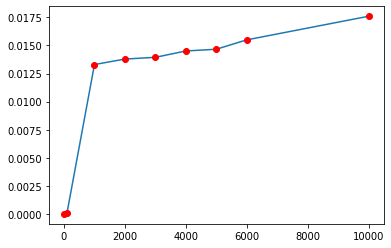

In [ ]:
# pour mieux apprécier les résultats, nous pouvons faire un graphique :
from time import time
def timeExpoRec(N) :
    temps=[]
    for _ in range(1000) :
      debut=time()
      expo_rec(2,N)
      fin=time()
      temps.append(fin-debut)
    temps.sort()
    return ( temps[-1] + temps[-2] + temps[-3] )/10


import sys 
sys.setrecursionlimit(2*10**4) 

abcisse = [10,100,1000,2000,3000,4000,5000,6000,10000]
ordonne = [timeExpoRec(N) for N in abcisse]
# plotting curves
import matplotlib.pyplot as plt
fig = plt.figure()
ax = plt.axes()
ax.plot(abcisse,ordonne);
ax.plot(abcisse,ordonne,"ro");

Et maintenant, pensez vous que ce soit linéaire ?

<font size="6">**B. Approche diviser pour régner avec des problèmes de taille N/2**</font>

On peut définir xn d'une autre façon :

#    $x^0$ = 1

#    $x^1$ = x

#    Si n est pair : $x^{2n}$ = ($x^{n}$)^2

#    Si n est impair : $x^{2n+1}$ = ($x^{2n}$)*x

Ce qui se traduit en Python par cette fonction (à compléter) :


In [ ]:
def expo_dr(x,n):
  if n==0 : return 1
  if n==1: return x
  if n%2==0 :
    return expo_dr(x,n//2)**2
  else :
    return expo_dr(x,n//2)**2*x

assert expo_dr(2,100)==2**100
assert expo_dr(2,101)==2**101

print(expo_dr(2,100))


1267650600228229401496703205376


1. Exécutez la fonction ci-dessus. 

2. Testez pour x=2 et n=8, puis n=128. 

3. Vérifiez, avec %timeit(), que la différence des temps d’exécutions des deux programmes est évidente pour par exemple le calcul de $2^{500}$



In [ ]:
%timeit(expo_rec(2,500))
%timeit(expo_dr(2,500))

10000 loops, best of 3: 88.6 µs per loop
100000 loops, best of 3: 3.7 µs per loop


4. Vérifier également que le second programme permet de calculer $2^{1000}$

In [ ]:
expo_dr(2,1000)

10715086071862673209484250490600018105614048117055336074437503883703510511249361224931983788156958581275946729175531468251871452856923140435984577574698574803934567774824230985421074605062371141877954182153046474983581941267398767559165543946077062914571196477686542167660429831652624386837205668069376

Essayons d'estimer la complexité avec %timeit()

In [ ]:
import sys 
import timeit

for N in [10,100,200,300,400,500,600,700,1000] :
  %timeit(expo_dr(2,N))

1000000 loops, best of 3: 1.34 µs per loop
100000 loops, best of 3: 2.58 µs per loop
100000 loops, best of 3: 3.04 µs per loop
100000 loops, best of 3: 3.69 µs per loop
100000 loops, best of 3: 3.5 µs per loop
100000 loops, best of 3: 3.7 µs per loop
100000 loops, best of 3: 4.16 µs per loop
100000 loops, best of 3: 4.3 µs per loop
100000 loops, best of 3: 4.33 µs per loop


Au vu de ces résultats, pensez vous que la complexité de cet algorithme est linéaire ?

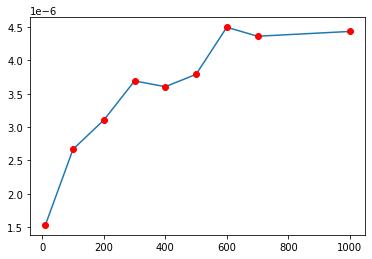

In [ ]:
# pour mieux apprécier les résultats, nous pouvons faire un graphique :
from time import time
def timeExpoDr(N) :
    temps=[]
    nb=500000
    for _ in range(50000) :
      debut=time()
      expo_dr(2,N)
      fin=time()
      temps.append(fin-debut)
    temps.sort()
    return sum( [temps[i] for i in range(-1*(nb//10),0)] )/(nb//10)


import sys 
sys.setrecursionlimit(2*10**4) 

abcisse = [10,100,200,300,400,500,600,700,1000]
ordonne = [timeExpoDr(N) for N in abcisse]
# plotting curves
import matplotlib.pyplot as plt
fig = plt.figure()
ax = plt.axes()
ax.plot(abcisse,ordonne);
ax.plot(abcisse,ordonne,"ro");

Et maintenant, pensez vous que ce soit linéaire ?

En réalité, la complexité ici est en $log_2(N)$, illustrons ceci avec un graphique :

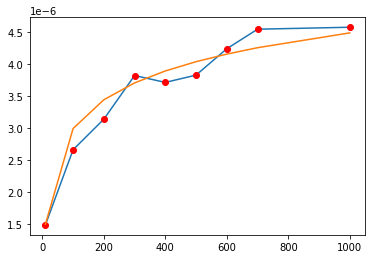

In [ ]:
# pour mieux apprécier les résultats, nous pouvons faire un graphique :
from time import time
def timeExpoDr(N) :
    temps=[]
    nb=500000
    for _ in range(50000) :
      debut=time()
      expo_dr(2,N)
      fin=time()
      temps.append(fin-debut)
    temps.sort()
    return sum( [temps[i] for i in range(-1*(nb//10),0)] )/(nb//10)

from math import log2

abcisse = [10,100,200,300,400,500,600,700,1000]
ordonne = [timeExpoDr(N) for N in abcisse]
k=0.45*10**(-6)
log2 = [log2(N)*k for N in abcisse]
# plotting curves
import matplotlib.pyplot as plt
fig = plt.figure()
ax = plt.axes()
ax.plot(abcisse,ordonne);
ax.plot(abcisse,ordonne,"ro");
ax.plot(abcisse,log2);


On peut montrer que la complexité (en regardant le nombre de multiplication) de cet algorithme est en O(log2(n)).

Nous allons voir cela, mais essayons d'approcher la réponse.

**Combien de multplications ferons nous pour évaluer expo_dr(2,128) ?**

réponse : 7

$2^{128} = (2^{64})^2 = = ((2^{32})^2)^2 = (((2^{16})^2)^2)^2 =  (((2^{8})^2)^2)^2)^2 = ((((2^{4})^2)^2)^2)^2)^2 = (((2^{2})^2)^2)^2)^2)^2$

et finalement :
$2^{128} = ((((((2^{1})^2)^2)^2)^2)^2)^2)^2$

Chaque élévation au carré coute une multiplication. On élève 7 fois au carré, et donc on élève ici à la puissance $2^7$

Ceci parce qu'on effectue des divisions successives par 2, d'une part, et que 
$2^7=128$ 

Or, $2^7=128$ est equivalent à $log_2(128)=7$ il faudra donc faire 7 multiplications pour calculer $x^{128}$ .

**ATTENTION**

La complexité d'un algorithme est une chose, celle d'un code qui l'implémente en est une autre.

Pour de grandes valeurs de N la complexité de l'algorithme est bien $log_2(N)$ mais celle du code devient linéaire :

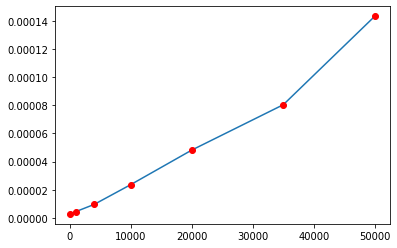

In [ ]:
# pour mieux apprécier les résultats, nous pouvons faire un graphique :
from time import time
def timeExpoDr(N) :
    temps=[]
    nb=500000
    for _ in range(50000) :
      debut=time()
      expo_dr(2,N)
      fin=time()
      temps.append(fin-debut)
    temps.sort()
    return sum( [temps[i] for i in range(-1*(nb//10),0)] )/(nb//10)

from math import log2

abcisse = [100,1000,4000,10000,20000,35000,50000]
ordonne = [timeExpoDr(N) for N in abcisse]

# plotting curves
import matplotlib.pyplot as plt
fig = plt.figure()
ax = plt.axes()
ax.plot(abcisse,ordonne);
ax.plot(abcisse,ordonne,"ro");


La raison est que les nombres générés sont énormes, et python doit allouer de la mémoire (en quantité importante). Cela nécessite des opérations couteuses en temps.

## **2. Vidéo sur les complexités**

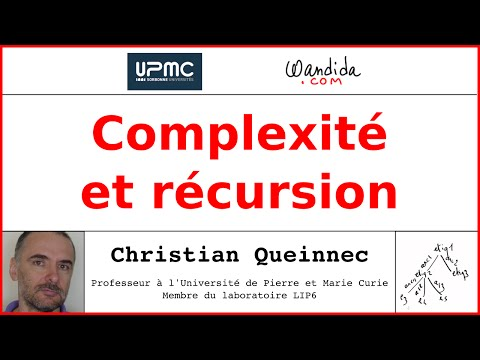

In [ ]:
# Extrait du film Wargames 1983
from IPython.display import YouTubeVideo
YouTubeVideo('UcT_4cWfnAs')

## **3. TD: Recherche d'un élément dans une liste**

### 3.1 Recherche d'un élément dans une liste non triée

Le problème est de rechercher la présence d’un élément dans une liste.

En adoptant le paradigme "diviser pour régner", l’idée pour résoudre cette question est de rechercher récursivement l’élément dans la première moitié de la liste et dans la seconde,puis de combiner les résultats via l’opérateur logique **or**.

En effet, l’élément recherché sera dans la liste s’il est dans la première moitié ou dans la seconde. La condition d’arrêt à la récursivité sera l’obtention d’une liste à un seul élément,car il est alors immédiat de conclure si l’élément recherché appartient à une telle liste ounon.

Voici donc les trois étapes de la résolution de ce problème via la méthode "diviser pour régner":

• **Diviser la liste en deux sous-listes en la “coupant” par la moitié.**

• **Rechercher la présence de l’élément dans chacune de ces sous-listes. Arrêter la récursion lorsque les listes n’ont plus qu’un seul élément.**

• **Combiner avec l’opérateur logique <font color="blue">or</font> les résultats obtenus.**

Voici l’algorithme :

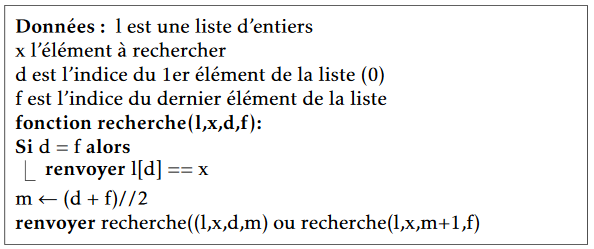


**Exercice :**

Implémenter cet algorithme en Python ci-dessous, et le tester sur la liste suivante :

L=[95, 28, 36, 52, 85, 56, 34, 59, 17, 26, 16, 25, 69, 98, 4, 85, 81, 48, 11, 57]

In [ ]:
# version sans slicing 

def recherche(l,x,d,f):
  if f-d==1 : return l[d]==x
  return recherche(l,x,d,(f+d)//2) or recherche(l,x,(f+d)//2,f)

L=[95, 28, 36, 52, 85, 56, 34, 59, 17, 26, 16, 25, 69, 98, 4, 85, 81, 48, 11, 57]
print(recherche(L,28,0,len(L)))
print(recherche(L,59,0,len(L)))
print(recherche(L,57,0,len(L)))
print(recherche(L,95,0,len(L)))
print(recherche(L,11,0,len(L)))
print(recherche(L,9,0,len(L)))

True
True
True
True
True
False


In [ ]:
# version avec slicing (plus simple ?)
def rechercheSlice(l,x):
  if len(l)==1 : return l[0]==x
  return rechercheSlice(l[:len(l)//2],x) or rechercheSlice(l[len(l)//2:],x)

L=[95, 28, 36, 52, 85, 56, 34, 59, 17, 26, 16, 25, 69, 98, 4, 85, 81, 48, 11, 57]
print(rechercheSlice(L,28))
print(rechercheSlice(L,59))
print(rechercheSlice(L,57))
print(rechercheSlice(L,95))
print(rechercheSlice(L,11))
print(rechercheSlice(L,9))

True
True
True
True
True
False


In [ ]:
# comparaison avec et sans slices :
for N in [100,1000,10000] :
  print('N=',N)
  L=[i for i in range(N)]
  %timeit(recherche(L,-1,0,len(L)))
  %timeit(rechercheSlice(L,-1))

N= 100
10000 loops, best of 3: 33.5 µs per loop
10000 loops, best of 3: 57.9 µs per loop
N= 1000
1000 loops, best of 3: 367 µs per loop
1000 loops, best of 3: 597 µs per loop
N= 10000
100 loops, best of 3: 4.04 ms per loop
100 loops, best of 3: 6.1 ms per loop


Les deux versions semblent linéaires.... la version utilisant les slices est plus couteuse.

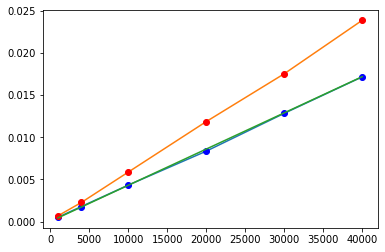

In [ ]:
# pour mieux apprécier les résultats, nous pouvons faire un graphique :
from time import time
def timeRecherche(N) :
    temps=[]
    nb=200
    for _ in range(nb) :
      L=[i for i in range(N)]
      debut=time()
      recherche(L,-1,0,len(L))
      fin=time()
      temps.append(fin-debut)
    temps.sort()
    return sum( [temps[i] for i in range(-1*(nb//4),0)] )/(nb//4)

def timeRechercheSlice(N) :
    temps=[]
    nb=200
    for _ in range(nb) :
      L=[i for i in range(N)]
      debut=time()
      rechercheSlice(L,-1)
      fin=time()
      temps.append(fin-debut)
    temps.sort()
    return sum( [temps[i] for i in range(-1*(nb//4),0)] )/(nb//4)
from math import log2

abcisse = [1000,4000,10000,20000,30000,40000]
ordonne = [timeRecherche(N) for N in abcisse]
ordonneS = [timeRechercheSlice(N) for N in abcisse]
k=0.43*10**(-6)
line = [i*k for i in abcisse]
# plotting curves
import matplotlib.pyplot as plt
fig = plt.figure()
ax = plt.axes()
ax.plot(abcisse,ordonne);
ax.plot(abcisse,ordonne,"bo");
ax.plot(abcisse,ordonneS);
ax.plot(abcisse,ordonneS,"ro");
ax.plot(abcisse,line);

Dans les 2 cas, la complexité est linéaire, mais notez quand même la moindre performance avec l'utilisation des slices

### 3.2 Recherche d'un élément dans une liste triée

Le problème est de rechercher la présence d’un élément dans une liste préalablement triée.

L’idée pour résoudre cette question est d’utiliser une méthode **dichotomique** (vue l'année dernière en classe de première).La liste étant triée, après comparaison avec l’élément du "milieu" il est en effet facile de voir dans quelle moitié peut éventuellement se trouver l’élément cherché. On aura plus alors qu’à recommencer récursivement la recherche.

Le terme dichotomie provient du grec ancien "**dikhotomia**", signifiant "division en deux parties".

Voici donc les trois étapes de la résolution de ce problème via la méthode "diviser pour régner".

• **Diviser la liste en deux sous-listes en la “coupant” par la moitié.**

• **Rechercher récursivement la présence de l’élément recherché dans la “bonne” des deux sous-listes après l’avoir comparé à l’élément situé au milieu de la liste.**

• **Pas de résultats à combiner puisque l’on ne “travaille” que sur l’une des deux sous-listes.**

**Exercice:**
Codez ci-dessous cette fonction de recherche dichotomique, et testez là sur la même liste que l'exercice précédent

In [ ]:
# version sans slicing 
def dicho(l,x,a,b):
  if a==b : return False
  m=(b+a)//2
  if l[m] == x : return True
  elif l[m]>x : return dicho(l,x,a,m)
  else : return dicho(l,x,m,b)

L=[i for i in range(100)]
print(dicho(L,0,0,len(L)))
print(dicho(L,59,0,len(L)))
print(dicho(L,57,0,len(L)))
print(dicho(L,95,0,len(L)))
print(dicho(L,11,0,len(L)))
print(dicho(L,-9,0,len(L)))

True
True
True
True
True
False


In [ ]:
# version avec slicing 
def dichoSlice(l,x):
  if len(l)==1 : return l[0]==x
  m=len(l)//2
  if l[m] == x : return True
  elif l[m]>x : return dichoSlice(l[:len(l)//2],x)
  else : return dichoSlice(l[len(l)//2:],x)

L=[i for i in range(100)]
print(rechercheSlice(L,28))
print(rechercheSlice(L,59))
print(rechercheSlice(L,57))
print(rechercheSlice(L,95))
print(rechercheSlice(L,11))
print(rechercheSlice(L,-9))

True
True
True
True
True
False


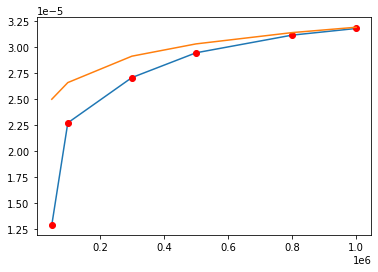

In [ ]:
# Observons la complexité expérimentale avec graphique :
from time import time
def timeDicho(N) :
    temps=[]
    nb=200
    for _ in range(nb) :
      L=[i for i in range(N)]
      debut=time()
      dicho(L,-1,0,N)
      fin=time()
      temps.append(fin-debut)
    temps.sort()
    return sum( [temps[i] for i in range(-1*(nb//4),0)] )/(nb//4)

from math import log2

abcisse = [50000,100000,300000,500000,800000,1000000]
ordonne = [timeDicho(N) for N in abcisse]
k=1.6*10**(-6)
log2 = [log2(N)*k for N in abcisse]
# plotting curves
import matplotlib.pyplot as plt
fig = plt.figure()
ax = plt.axes()
ax.plot(abcisse,ordonne);
ax.plot(abcisse,ordonne,"ro");
ax.plot(abcisse,log2);

Nous avions déjà étudié cet algorithme en première.

Pour une liste de longueur N, dans le pire des cas (cas ou la veleur cherchée n'est pas dans la liste) on divisera en 2 jusqu'à obtenir des liste de 1 élément.

Le nombre de division est le plus petit entier n tel que $2^n > N$

Par exemple si N=128 on coupera 7 fois le problème, mais ici on ne traitera à chaque fois qu'un seul sous problème.

La complexité est donc en $O( log_2(N) )$ et c'est bien ce qui est observé expérimentalement.

On peut comparer les versions avec et sans slices :

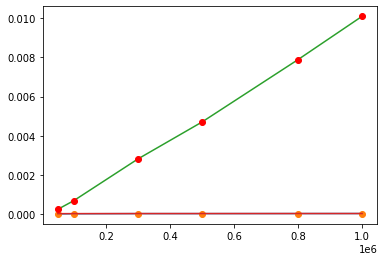

In [ ]:
# Comparaisons de la dichotomie versions avec ou sans slices :
from time import time
def timeDicho(N) :
    temps=[]
    nb=200
    for _ in range(nb) :
      L=[i for i in range(N)]
      debut=time()
      dicho(L,-1,0,N)
      fin=time()
      temps.append(fin-debut)
    temps.sort()
    return sum( [temps[i] for i in range(-1*(nb//4),0)] )/(nb//4)

def timeDichoSlices(N) :
    temps=[]
    nb=200
    for _ in range(nb) :
      L=[i for i in range(N)]
      debut=time()
      dichoSlice(L,-1)
      fin=time()
      temps.append(fin-debut)
    temps.sort()
    return sum( [temps[i] for i in range(-1*(nb//4),0)] )/(nb//4)
from math import log2

abcisse = [50000,100000,300000,500000,800000,1000000]
ordonne = [timeDicho(N) for N in abcisse]
ordonneS = [timeDichoSlices(N) for N in abcisse]
k=1.6*10**(-6)
log2 = [log2(N)*k for N in abcisse]
# plotting curves
import matplotlib.pyplot as plt
fig = plt.figure()
ax = plt.axes()
ax.plot(abcisse,ordonne);
ax.plot(abcisse,ordonne,"o");
ax.plot(abcisse,ordonneS);
ax.plot(abcisse,ordonneS,"ro");
ax.plot(abcisse,log2);

C'est la catastrophe !!!

L'utilisation des slices ici induits de nombreuses copies de listes, qui réduisent nos efforts à néant ! la complexité est linéaire, comme une simple recherche en parcouran la liste complètement.

### 3.3 Recherche du maximum dans une liste

Le problème est de rechercher le maximum d’une liste de nombres.

En adoptant le paradigme "diviser pour régner", l’idée pour résoudre cette question est de rechercher récursivementle maximum de la première moitié de la liste et celui de la seconde, puis de les comparer. Le plus grand des deux sera le maximum de toute la liste. 

La condition d’arrêt à la récursivité sera l’obtention d’une liste à un seul élément, son maximum étant bien sûr la valeur de cet élément.

Voici donc les trois étapes de la résolution de ce problème via la méthode "diviser pourrégner":

• **Diviser la liste en deux sous-listes en la “coupant” par la moitié.**

• **Rechercher récursivementle maximum de chacune de ces sous-listes. Arrêter la récursion lorsque les listes n’ont plus qu’un seul élément.**

• **Retourner le plus grand des deux maximums précédents.**

**Exercice:**
Codez ci-dessous cette fonction du maximum dans une liste, et testez là sur la même liste que l'exercice précédent (elle devra renvoyer 98)

---
Auteur : François Hallé et Jean-Louis Thirot - Lycée Bertrand d'Argentré, Vitré

Sources :  [Cours de NSI - lycée de Draguignan](https://isn-icn-ljm.pagesperso-orange.fr/NSI-TLE/co/section_chapitre6.html)

Ce document est publié sous license 
[CC BY-NC-SA](https://creativecommons.org/licenses/by-nc-sa/4.0/)

---